# CHAPTER 07.군집화
## 01. K-평균 알고리즘 이해

#### K-평균
: 군집화(Clustering)에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.
- 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다.
- 모든 데이터 포인트에서 더이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화 하는 기법이다.

- **K-평균의 장점** 
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘이다.
    - 알고리즘이 쉽고 간결하다
    

- **K-평균의 단점**
    - 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다(PCA 차원 감소 적용 해야 할 수 있다.)
    - 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
    - 몇 개의 군집을 선택해야 할 지 가이드하기 어렵다.

### 사이킷런 KMeans 클래스 소개
- K-평균 구현하기 위해 **KMeans** 클래스 사용

In [ ]:
class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                            precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
                            n_jobs=1, algorithm='auto')b

- **중요한 파라미터**
    - **n_clusters** : 군집화할 개수, 즉 군집 중심점의 개수를 의미한다. 가장 중요한 파라미터
    - **init** : 초기에 군집 중심점의 좌표를 설정할 방식. 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++방식으로 최초 설정한다.
    - **max_iter** : 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료한다.
    

- **주요 속성 정보** (군집화 수행 완료 후)
    - **labels_** : 각 데이터 포인트가 속한 군집 중심점 레이블
    - **cluster_centers_** : 각 군집 중심점 좌표([군집개수, 피처개수]). 군집 중심점 좌표가 어디인지 시각화 할 수 있다.

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [2]:
# 붓꽃의 꽃받침(sepal)과 꽃잎(petal) 길이와 너비에 따른 품종을 분류하는 데이터 세트
# 필요한 모듈과 데이터 세트 로드

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 dataframe으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# 붓꽃 데이터 세트를 3개 그룹으로 군집화

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
# label_속성값 출력

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미한다.

In [5]:
# 실제 붓꽃 품종 분류값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인

irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
# group by를 이용해 target과 cluster값 개수 비교
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [7]:
# 붓꽃 데이터 세트의 군집화를 시각화

# 2차원 평면상에서 개별 데이터 군집화를 시각적으로 표현
# 속성이 4개이므로 2차원 평면에 적합하지 않아 PCA를 이용해 2개로 차원 축소한 뒤 X좌표, Y좌표로 개별 데이터 표현

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


pca_x는 X 좌표 값, pca_y는 Y 좌표 값을 나타낸다.

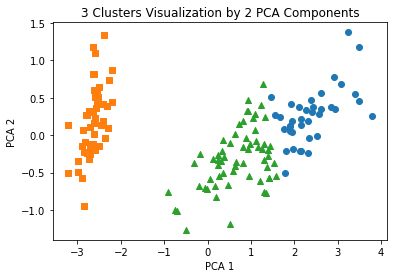

In [9]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

Cluster 1을 나타네는 네모(s)는 명확히 다른 군집과 잘 분리되어 있다. cluster 0을 나타내는 동그라미(o)와 Cluster 2를 나타내는 세모(^)는 상당 수준 분리돼 있지만, 네모만큼 명확하진 않다. 이 둘은 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다.

### 군집화 알고리즘 테스트를 위한 데이터 생성
#### 대표적인 군집화용 데이터 생성기 : make_blobs( ), make_classification( )
: 두 API는 비슷하게 여러 개의 클래스에 해당하는 데이터 세트를 만드는데, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터 생성. 둘다 분류 용도 로도 테스트 데이터 생성 가능
- 차이점
    - make_blobs( ) : 개별 군집의 중심점과 표준 편차 제어기능 추가되어있음
    - make_classification( ) : 노이즈를 포함한 데이터를 만드는데 유용하게 사용할 수 있다.
    - 이외에 make_circle( ), make_moon( ) API는 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용

#### make_blobs( )
: 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플로 반환된다.
- 호출 파라미터
    - **n_samples** : 생성할 총 데이터의 개수(디폴트 100개)
    - **n_features** : 데이터의 피처 개수. 시각화가 목표이면 2개로 설정해 첫번째 피처는 x, 두 번째 피처는 y 좌표상에 표현한다.
    - **centers** : int값. 숫자로 설정하면 군집의 개수를 나타낸다. ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미한다.
    - **cluster_std** : 생성될 군집 데이터의 표준편차를 의미. ndarray 형태일 경우 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들때 사용한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)